In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load cleaned dataset
df = pd.read_csv('data/climate_all_cleaned.csv', parse_dates=['Date'], date_format='%d-%m-%Y')


# Basic settings
pd.set_option('display.max_columns', None)
sns.set_style('whitegrid')


In [2]:
# First 5 rows
df.head()


,Date,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Evaporation (mm),Sunshine (hours),Direction of maximum wind gust,Speed of maximum wind gust (km/h),Time of maximum wind gust,9am Temperature (°C),9am relative humidity (%),9am cloud amount (oktas),9am wind direction,9am wind speed (km/h),9am MSL pressure (hPa),3pm Temperature (°C),3pm relative humidity (%),3pm cloud amount (oktas),3pm wind direction,3pm wind speed (km/h),3pm MSL pressure (hPa)
0,01/01/24,12.6,23.2,0.0,7.2,11.4,SSW,31.0,14:35,17.6,65,7,SW,4,1021.7,22.5,60,7.0,SSW,13,1017.7
1,02/01/24,16.9,24.7,0.0,6.8,3.3,SW,41.0,14:23,19.6,81,7,NNW,7,1017.4,21.9,77,8.0,SW,15,1014.8
2,03/01/24,17.8,26.9,17.8,5.8,3.6,S,30.0,21:34,19.3,100,7,,Calm,1015.4,26.3,70,7.0,S,6,1013.3
3,04/01/24,17.8,21.9,1.0,4.0,3.2,SSW,33.0,17:46,18.3,80,8,SSW,11,1020.1,20.3,71,7.0,SSW,15,1019.8
4,05/01/24,15.9,28.9,0.0,4.8,5.7,SE,31.0,18:48,19.9,81,7,NW,6,1021.2,26.4,58,6.0,SSW,9,1019.0


In [3]:
# Null values
df.isnull().sum()[df.isnull().sum() > 0]


Series([], dtype: int64)

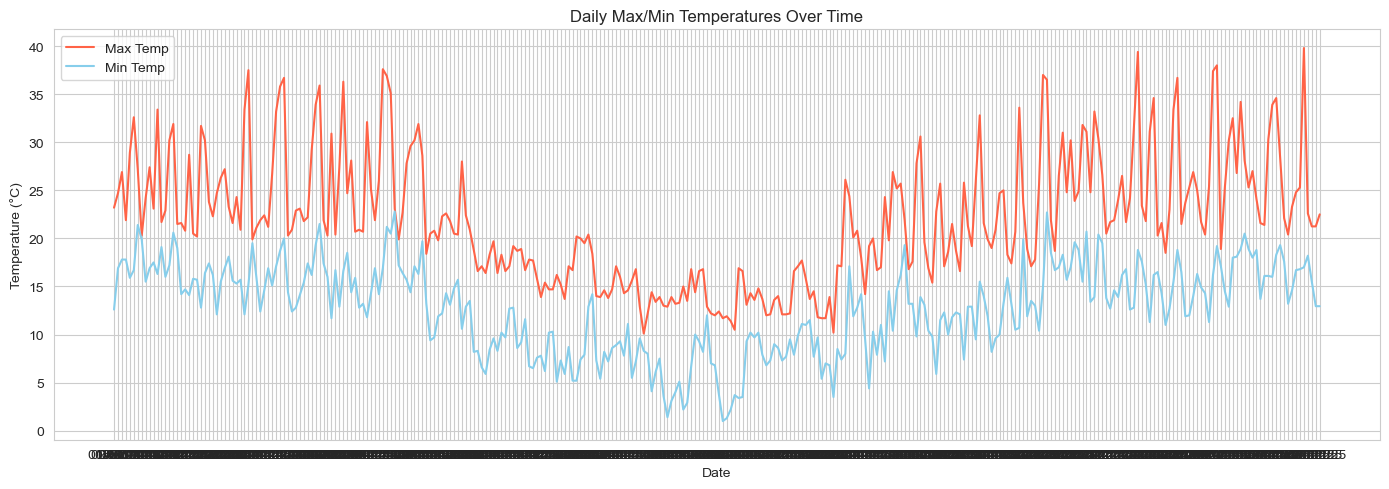

In [4]:
# Temperature trends over time
plt.figure(figsize=(14, 5))
plt.plot(df['Date'], df['Maximum temperature (°C)'], label='Max Temp', color='tomato')
plt.plot(df['Date'], df['Minimum temperature (°C)'], label='Min Temp', color='skyblue')
plt.title('Daily Max/Min Temperatures Over Time')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.tight_layout()
plt.show()


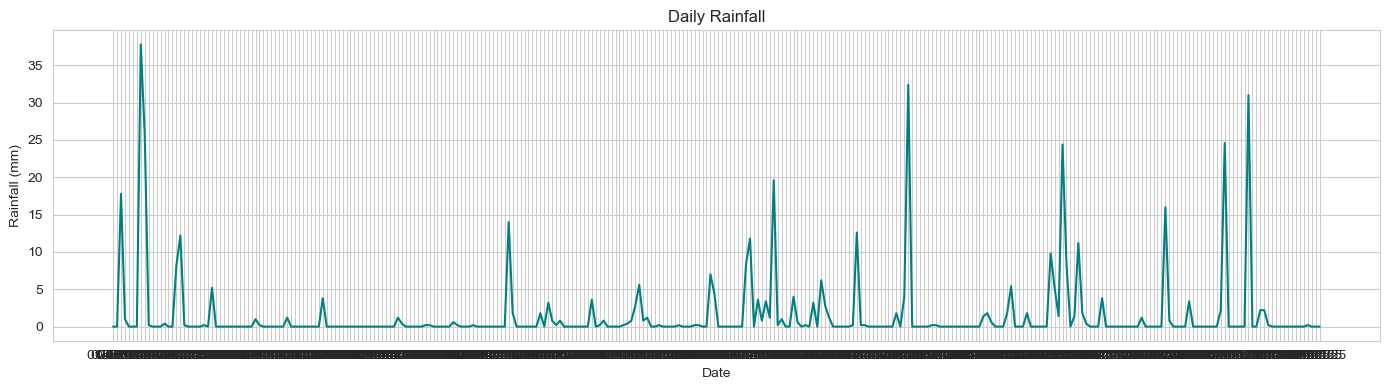

In [5]:
# Rainfall over time
plt.figure(figsize=(14, 4))
plt.plot(df['Date'], df['Rainfall (mm)'], color='teal')
plt.title('Daily Rainfall')
plt.xlabel('Date')
plt.ylabel('Rainfall (mm)')
plt.tight_layout()
plt.show()


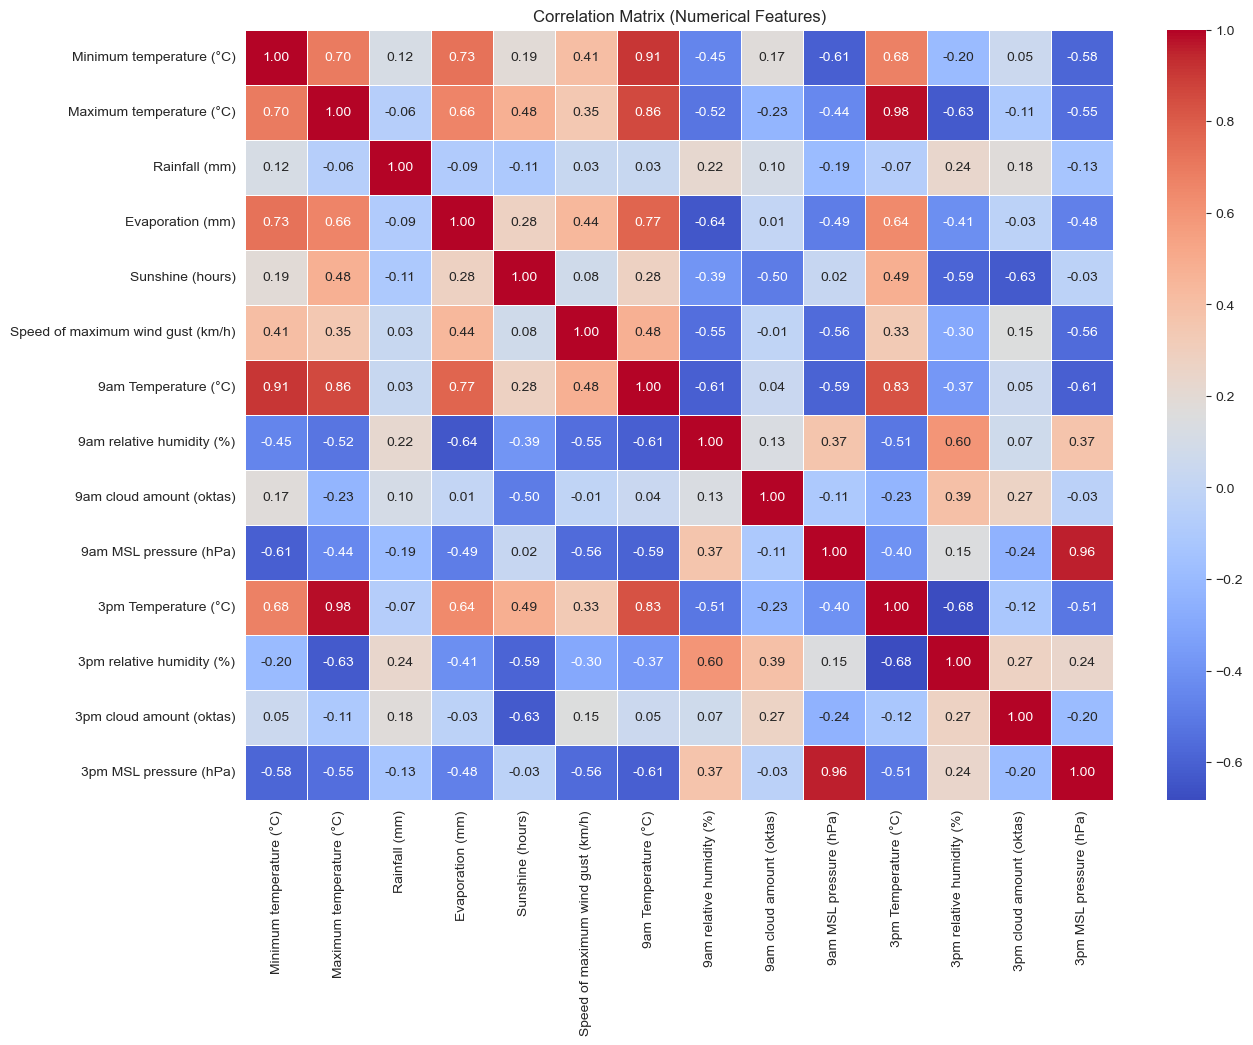

In [6]:
# Select only numeric features
numeric_df = df.select_dtypes(include='number')

plt.figure(figsize=(14, 10))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix (Numerical Features)')
plt.show()


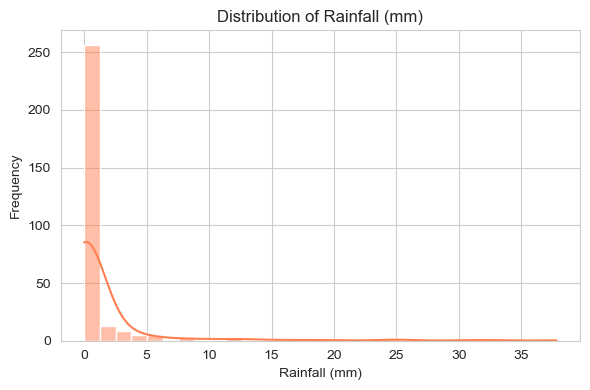

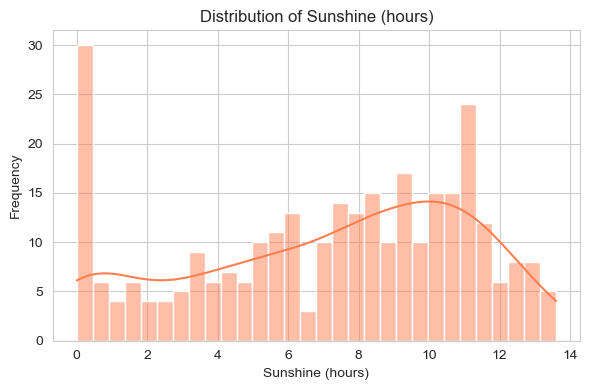

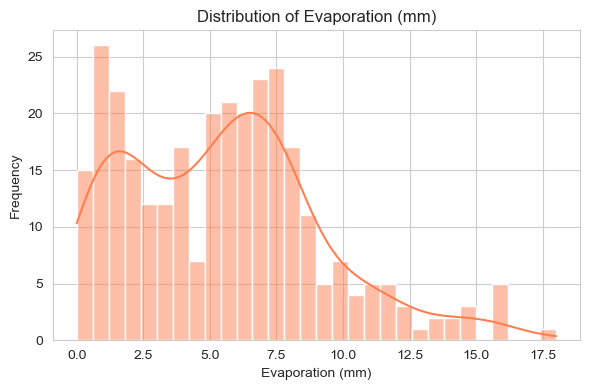

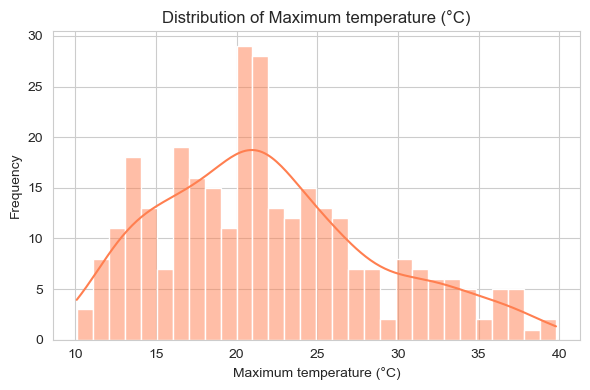

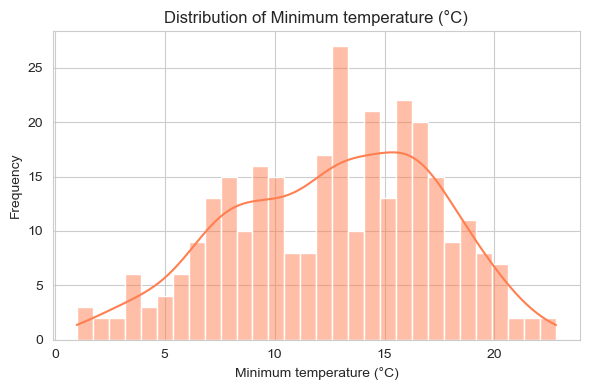

In [7]:
features = ['Rainfall (mm)', 'Sunshine (hours)', 'Evaporation (mm)', 'Maximum temperature (°C)', 'Minimum temperature (°C)']

for col in features:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True, bins=30, color='coral')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()


C:\Users\ANIRU\AppData\Local\Temp\ipykernel_3640\979813303.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_directions.index, y=top_directions.values, palette='viridis')


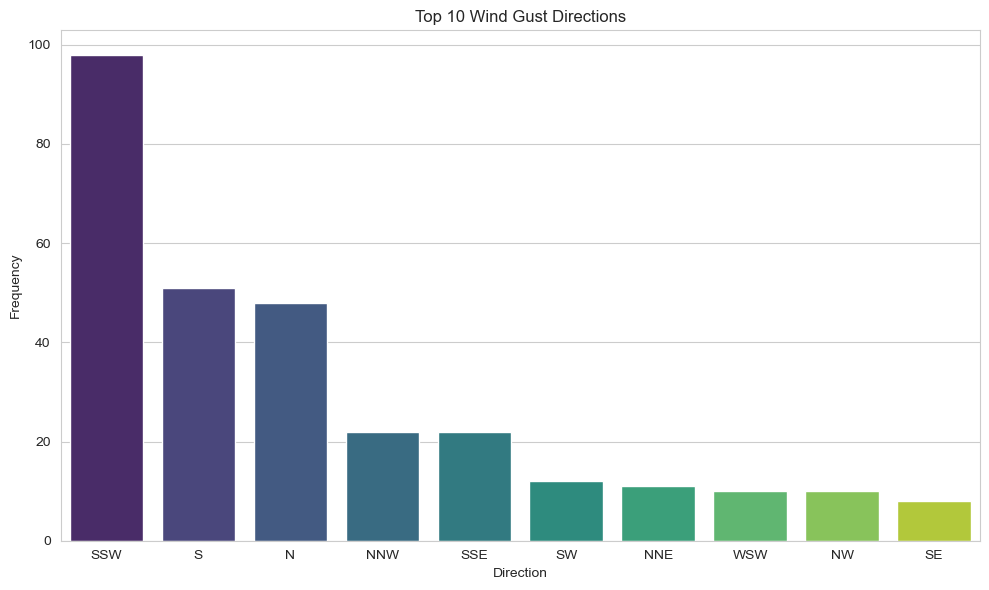

In [8]:
# Top wind gust speeds and directions
plt.figure(figsize=(10, 6))
top_directions = df['Direction of maximum wind gust '].value_counts().head(10)
sns.barplot(x=top_directions.index, y=top_directions.values, palette='viridis')
plt.title('Top 10 Wind Gust Directions')
plt.ylabel('Frequency')
plt.xlabel('Direction')
plt.tight_layout()
plt.show()


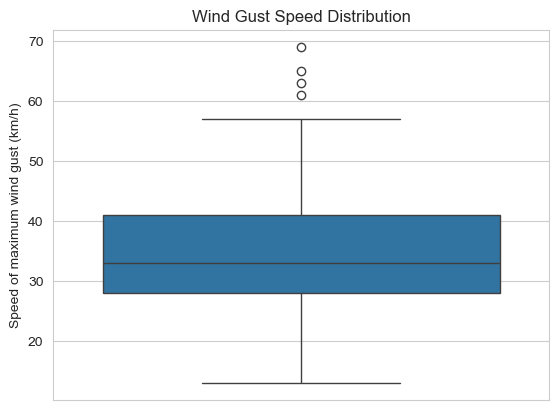

In [9]:
# Gust speed distribution
sns.boxplot(y=df['Speed of maximum wind gust (km/h)'])
plt.title('Wind Gust Speed Distribution')
plt.show()
